In [22]:
#Making a noiseMap from the 4ways

from flipper import liteMap
import matplotlib.pyplot as plt
import numpy as np
from cactusLib import filterLib
from cactusLib.cactusUtils import saveFits

In [23]:
#Marsden Area

RA0 = 3.
RA1 = 106.75
DEC0 = -56.2
DEC1 = -49.0


fw0m = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split0_v3_src_free.fits")
fw1m = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split1_v3_src_free.fits")
fw2m = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split2_v3_src_free.fits")
fw3m = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split3_v3_src_free.fits")

#fw0m = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split0_v3_summed.fits")
#fw1m = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split1_v3_summed.fits")
#fw2m = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split2_v3_summed.fits")
#fw3m = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split3_v3_summed.fits")


fw0w = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split0_hits_v3.fits")
fw1w = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split1_hits_v3.fits")
fw2w = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split2_hits_v3.fits")
fw3w = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_4way_split3_hits_v3.fits")

ar2s2lt = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_1way_v3_srcfree.fits")
ar2s2wlt = liteMap.liteMapFromFits("/home/cvargas/data/act/act_depots/cactus_depots/20180419/ACT_220_south_season_2_1way_hits_v3.fits")

fw0m = fw0m.selectSubMap(RA0,RA1,DEC0,DEC1)
fw1m = fw1m.selectSubMap(RA0,RA1,DEC0,DEC1)
fw2m = fw2m.selectSubMap(RA0,RA1,DEC0,DEC1)
fw3m = fw3m.selectSubMap(RA0,RA1,DEC0,DEC1)

fw0w = fw0w.selectSubMap(RA0,RA1,DEC0,DEC1)
fw1w = fw1w.selectSubMap(RA0,RA1,DEC0,DEC1)
fw2w = fw2w.selectSubMap(RA0,RA1,DEC0,DEC1)
fw3w = fw3w.selectSubMap(RA0,RA1,DEC0,DEC1)

ar2s2lt = ar2s2lt.selectSubMap(RA0,RA1,DEC0,DEC1)
ar2s2wlt = ar2s2wlt.selectSubMap(RA0,RA1,DEC0,DEC1)

ar2s2m = ar2s2lt.copy()
ar2s2m.data = ar2s2lt.data*np.sqrt(ar2s2wlt.data)

In [24]:
owm = fw0m.copy()

oww = fw0m.copy()
oww.data = fw0w.data + fw1w.data + fw2w.data + fw3w.data

owm.data = (+fw0m.data*fw0w.data - fw1m.data*fw1w.data + fw2m.data*fw2w.data - fw3m.data*fw3w.data)/oww.data

owm.data*= np.sqrt(oww.data)



In [25]:
saveFits(oww.data,"4ways_hits_summed.fits",oww.header)
saveFits(ar2s2wlt.data,"1way_hits.fits",ar2s2wlt.header)

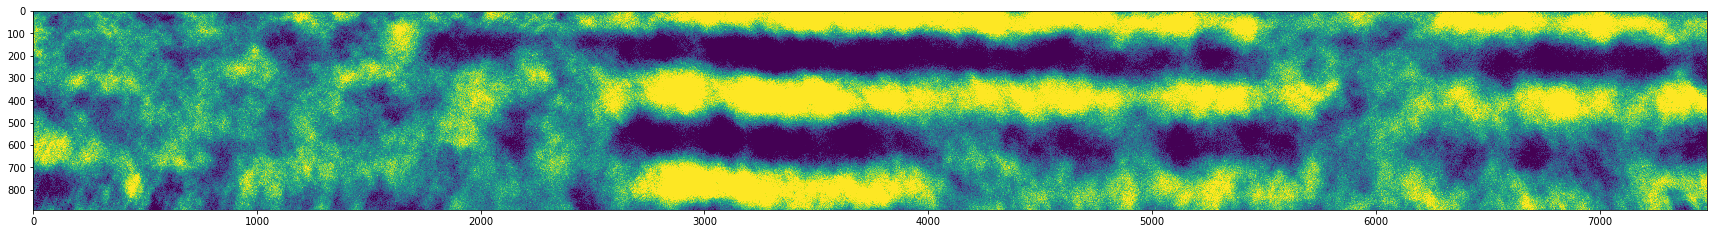

In [26]:
plt.figure(figsize=(30,15))
plt.imshow(owm.data,vmin=-200000,vmax=200000)
plt.show()

In [27]:
np.std(owm.data)

141078.32209030332

In [7]:
#%matplotlib auto

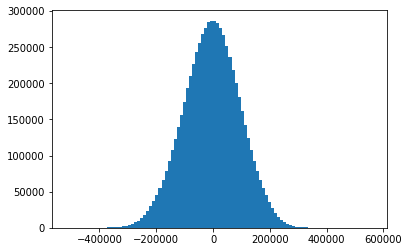

In [8]:
plt.hist(owm.data.flatten(),100)
plt.show()

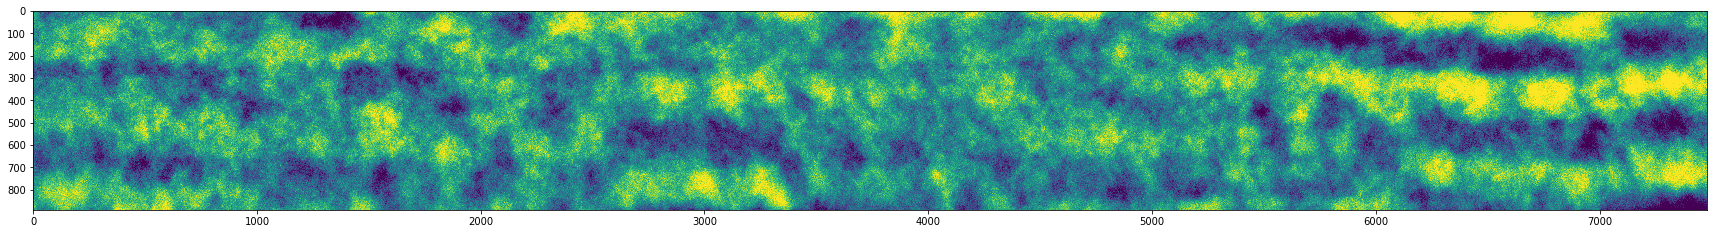

In [9]:
plt.figure(figsize=(30,15))
plt.imshow(ar2s2m.data,vmin=-200000,vmax=200000)
plt.show()

In [10]:
np.std(ar2s2m.data)

88121.19930551681

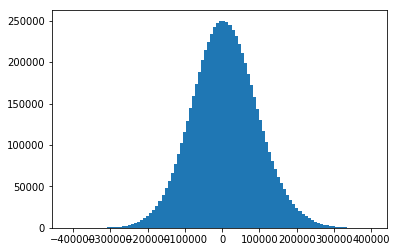

In [11]:
plt.hist(ar2s2m.data.flatten(),100)
plt.show()

In [13]:
99019./88121.

1.123670861656132